<a href="https://colab.research.google.com/github/LongNguyen1984/TimeSeriesWithPython/blob/main/SingularSpectrumAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##This example is to applied **Singular Spectrum Analysis (SSA)** to decomposition signal from noise

More tutorial:
https://www.kaggle.com/jdarcy/introducing-ssa-for-time-series-decomposition

### Install pyts package

In [1]:
!pip install pyts

     |████████████████████████████████| 2.5 MB 5.4 MB/s 


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.decomposition import SingularSpectrumAnalysis

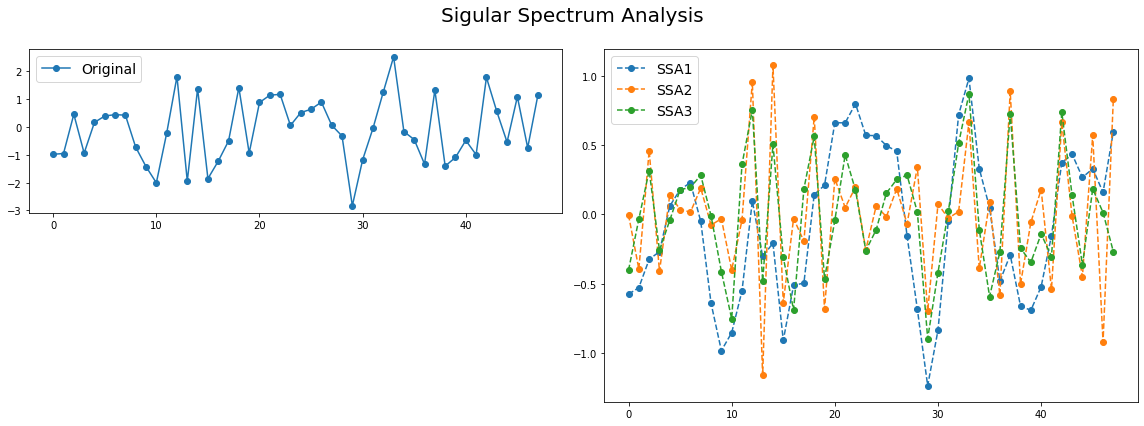

In [ ]:
# Parameters
n_samples, n_timestamps = 100, 48

# Toy dataset
rng = np.random.RandomState(41)
X = rng.randn(n_samples, n_timestamps)

# decompose the time series into three subseries
window_size = 25 #15
groups = [np.arange(i, i+5) for i in range(0, 21, 5)]

# Singular Spectrum Analysis
ssa = SingularSpectrumAnalysis(window_size=3, groups=None)
X_ssa = ssa.fit_transform(X)

# Show the results for the first time series and its subseries 
plt.figure(figsize= (16, 6))

ax1 = plt.subplot(221)
ax1.plot(X[1], 'o-', label = 'Original')
ax1.legend(loc='best', fontsize=14)

ax2 = plt.subplot(122)
for i in range(len(groups)-2):
  ax2.plot(X_ssa[1, i], 'o--', label='SSA{0}'.format(i+1))
ax2.legend(loc='best', fontsize=14)

plt.suptitle('Sigular Spectrum Analysis', fontsize=20)

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()


In [ ]:
len(groups)

5

In [ ]:
groups

In [ ]:
X[1]

array([-0.98520304, -0.95836832,  0.44910865, -0.94246256,  0.15890945,
        0.38807562,  0.43733776,  0.41822955, -0.73218499, -1.42828297,
       -2.00921735, -0.23343958,  1.80395237, -1.94867066,  1.36785101,
       -1.85873942, -1.23395073, -0.50756976,  1.4071715 , -0.94109705,
        0.87350473,  1.13510019,  1.1659844 ,  0.04921449,  0.51094674,
        0.63129939,  0.88770207,  0.05765164, -0.32954444, -2.83207869,
       -1.18255366, -0.05484602,  1.24835183,  2.51034292, -0.17133646,
       -0.45805514, -1.33878152,  1.32006292, -1.40932928, -1.09829722,
       -0.48675106, -1.00097056,  1.77387679,  0.55578305, -0.54871197,
        1.08001575, -0.75243358,  1.15879497])

##SSA Explaination
This explain based on the lecture: 
http://www.environnement.ens.fr/IMG/file/DavidPDF/SSA_beginners_guide_v9.pdf

bản chất của SSA là thực hiện tách tín hiệu chuỗi thời gian thành các chuỗi tín hiệu và nhiễu. 
Các chuỗi tín hiệu và nhiễu này được xem là kết quả của việc chiếu tín hiệu lên các không gian vector cơ bản như trong phân tích eigenvalues và eigenvectors. 

Tương tự như phân tích PCA của một tín hiệu. Việc phân tích PCA dựa trên tính toán tách tín hiệu gốc thành chuỗi tín hiệu với độ trễ từ 0-(M-1). Tập hợp M chuỗi tín hiệu  nay được gọi là chuỗi thời gian liên quan (Ma trận embedded *Y*). Sử dụng phương pháp tính eigenvalues và eigenvectors cho tập này ta có được ma trận M$\times$M eigenvalues (*$\rho$*) với các cột là các eigenvectors. 
Do đó Y_hat = Y*[$\rho$] là tập tín hiệu chiếu trên các eigenvectors của tín hiệu *Y*
* Step one: embedded time series


Tạo chuỗi dữ liệu có chiều dài N=20, độ trễ 0-3 (M=4)

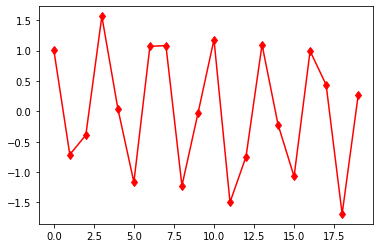

In [15]:
X = [1.0135518, -0.7113242, -0.3906069, 1.565203, 0.0439317, -1.1656093, 1.0701692, 1.0825379, -1.2239744, 
 -0.0321446, 1.1815997, -1.4969448, -0.7455299, 1.0973884, -0.2188716, -1.0719573, 0.9922009, 0.4374216, 
 -1.6880219, 0.2609807]

plt.plot(X, color='red',  marker='d') 

### Compute Covariance of X and lag of X k=0,1,2 and 3


In [116]:
import pandas as pd
def shiftData(data, delay=0):
  output = [0]*len(data)
  for i in range(delay,len(data)):
    output[i-delay]=data[i]  
  return output
### Make a embedded matrix Y
Y = pd.DataFrame()
#Z = shiftData(X, delay=3)
M = 4
for i in range(0, M):
  Y[str(i)]=shiftData(X,i)

In [52]:
Y

,0,1,2,3
0,1.013552,-0.711324,-0.390607,1.565203
1,-0.711324,-0.390607,1.565203,0.043932
2,-0.390607,1.565203,0.043932,-1.165609
3,1.565203,0.043932,-1.165609,1.070169
4,0.043932,-1.165609,1.070169,1.082538
5,-1.165609,1.070169,1.082538,-1.223974
6,1.070169,1.082538,-1.223974,-0.032145
7,1.082538,-1.223974,-0.032145,1.181600
8,-1.223974,-0.032145,1.181600,-1.496945
9,-0.032145,1.181600,-1.496945,-0.745530


### Correlation of each shift time series

In [88]:
YT = np.transpose(Y.values)
Yn = Y.values
N  = 20
# C = Y'*Y/N
C = [[sum(a*b/N for a,b in zip(X_row,Y_col)) for Y_col in zip(*Yn)] for X_row in YT]
C

[[0.9999999852085731,
  -0.2867228377777735,
  -0.654600840542422,
  0.687282528086864],
 [-0.2867228377777735,
  0.9486356226444111,
  -0.2506746416130955,
  -0.634805824213051],
 [-0.654600840542422,
  -0.2506746416130955,
  0.9233365167691292,
  -0.26456704864594455],
 [0.687282528086864,
  -0.634805824213051,
  -0.26456704864594455,
  0.9157078292527486]]

In [47]:
np.corrcoef(Y, rowvar=False)

array([[ 1.        , -0.2947822 , -0.68131863,  0.71822658],
       [-0.2947822 ,  1.        , -0.26905918, -0.6817934 ],
       [-0.68131863, -0.26905918,  1.        , -0.28769081],
       [ 0.71822658, -0.6817934 , -0.28769081,  1.        ]])

In [50]:
np.cov(Y, rowvar=False)

array([[ 1.05263156, -0.30181351, -0.68905352,  0.72345529],
       [-0.30181351,  0.99586043, -0.26467416, -0.66798093],
       [-0.68905352, -0.26467416,  0.9716928 , -0.27842134],
       [ 0.72345529, -0.66798093, -0.27842134,  0.96388242]])

#### Trị riêng và vec tơ riêng

[2.2043222  1.31686095 0.13933869 0.12715812]
[[ 0.621825   -0.2325486   0.66179128  0.34826301]
 [-0.36544134 -0.67591605 -0.21192972  0.60388402]
 [-0.36751051  0.65781922  0.25833138  0.60454512]
 [ 0.58713059  0.23734471 -0.6711058   0.38543762]]


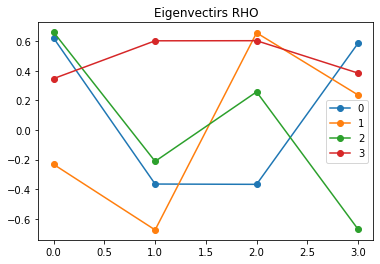

In [101]:
### Eigenvalues and eigenvector of C matrix
lbda, rho = np.linalg.eig(np.array(C))

print(lbda)
print(rho)
plt.plot(rho, marker='o')
plt.title('Eigenvectirs RHO')
plt.legend(Y.columns.values)

### Principle Components


In [108]:
PC = np.dot(Yn,rho)
PC

array([[ 1.95272981,  0.35963932, -0.32981235,  0.29057392],
       [-0.84901016,  1.46948249, -0.01310871,  0.47955959],
       [-1.51538925, -1.21486283,  0.20338283,  0.38645616],
       [ 2.01393063, -0.90644111,  0.00721705,  0.27945202],
       [ 0.69557234,  1.7385503 , -0.17393831,  0.37562336],
       [-2.23236593, -0.03067335,  0.1028791 ,  0.42299669],
       [ 0.70080424, -1.79335433,  0.18418812,  0.2740902 ],
       [ 1.82600677,  0.83486238,  0.17452832,  0.07386945],
       [-2.0625033 ,  0.72834764,  0.50664943, -0.30832514],
       [-0.33937416, -1.95285366, -0.15806748, -0.48997154],
       [ 2.20009411,  0.5070651 ,  0.17016198, -0.52020526],
       [-1.19019823,  1.52196321, -0.40228921, -0.39248465],
       [-1.41356152, -0.96677184, -0.06309904, -0.1424356 ],
       [ 1.73887534, -0.57691778, -0.17016452, -0.01560827],
       [ 0.14781702,  1.53195996,  0.04509275,  0.04486619],
       [-2.1810074 , -0.53426108,  0.32615216, -0.16033487],
       [ 1.23071892, -1.

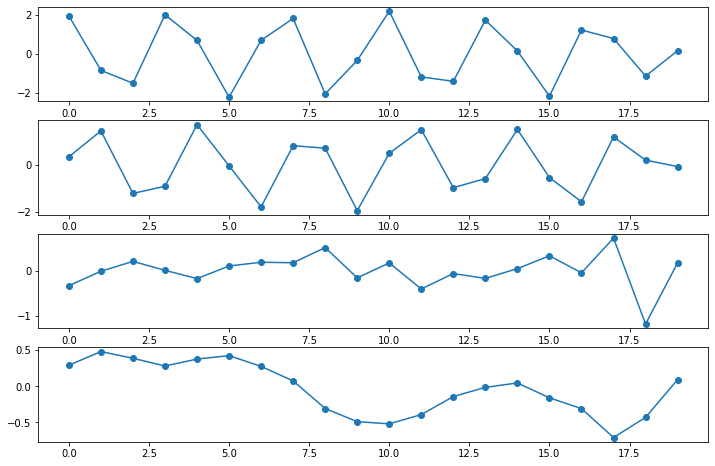

In [113]:
plt.figure(figsize=(12,8))
for i in range(0,M):
  plt.subplot(4,1,i+1)
  plt.plot(PC[:,i], marker='o')

In [ ]:
np.corrcoef(PC[:,0], PC[:,1])

Notice: 
* $3^{rd}$ and $4^{th}$ components contain very little variance. 
* First two PCs are in ** quadrature ** that they oscilate as a sine and a cosine with the same periode but with a 1/4 periode phase difference.


### Reconstruction of the time series
Chuỗi thời gian và các thành phần PCs không thể so sánh lẫn nhau được vì các thành phần PCs là hình chiếu theo một hệ quy chiếu khác cho nên việc diễn giải sẽ khác so với tín hiệu ban đầu X(t).

Tuy nhiên, bằng cách chiếu ngược các thành phần PCs lên các eigenvectors, ta sẽ thu được chuỗi thời gian (Tín hiệu khôi phục ** reconstructed components ** , RCs in SSA) ở hệ quy chiếu ban đầu (cùng đơn vị), mỗi một RC tương ứng với một PCs. 

Để làm việc này ta cần một ma trận Z, giống như Y, là một chuỗi embedded time series, nhưng khác với Y ở chỗ:
* Dùng một thành phần PC thay vì X
* thời gian trễ theo hướng ngược lại.
Mỗi ma trận Z tương ứng cho mỗi thành phần PCs


#### Tạo ma trận Z

In [131]:
import pandas as pd
def invShiftData(data, delay=0):
  output = [0]*len(data)
  for i in range(delay,len(data)):
    output[i]=data[i-delay]  
  return output
### Make a embedded matrix Y
Z1 = pd.DataFrame()
#Z = shiftData(PC[:,0], delay=3)
M = 4
for i in range(0, M):
  Z1[str(i)]=invShiftData(PC[:,0],i)

In [ ]:
Z1

#### Tín hiệu khôi phục được tính 
RC1 = Z * Eigenvector1/M = Z * rho(:,1)/M

In [136]:
RC1 = np.dot(Z1.values, rho[:,0])/M

In [137]:
RC1

array([ 0.30356405, -0.31038598, -0.33742306,  0.81615646, -0.0612519 ,
       -0.81805097,  0.54459663,  0.52704089, -0.87951443,  0.07076989,
        0.83054773, -0.65758389, -0.36296373,  0.83175072, -0.18071092,
       -0.71980588,  0.63223616,  0.23291438, -0.68365628,  0.23763114])

### Make a full reconstruction vector

In [139]:
RC = pd.DataFrame()

#Z = shiftData(PC[:,0], delay=3)
M = 4
for k in range(0, M):
  #Build M matrix Z, each Z for each PC components
  Z1 = pd.DataFrame()
  for i in range(0, M):
    Z1[str(i)]=invShiftData(PC[:,k],i)
  RC[str(k)] = np.dot(Z1.values, rho[:,k])/M
RC

,0,1,2,3
0,0.303564,-0.020908,-0.054567,0.025299
1,-0.310386,-0.146203,0.015305,0.085621
2,-0.337423,-0.118539,0.013044,0.149963
3,0.816156,0.520987,0.044906,0.183153
4,-0.061252,-0.060501,-0.013826,0.179511
5,-0.818051,-0.513149,-0.007420,0.173011
6,0.544597,0.341572,0.012578,0.171422
7,0.527041,0.352617,0.054944,0.147936
8,-0.879514,-0.480164,0.069212,0.066492
9,0.070770,0.021344,-0.072626,-0.051632


#### Plot reconstructed signals

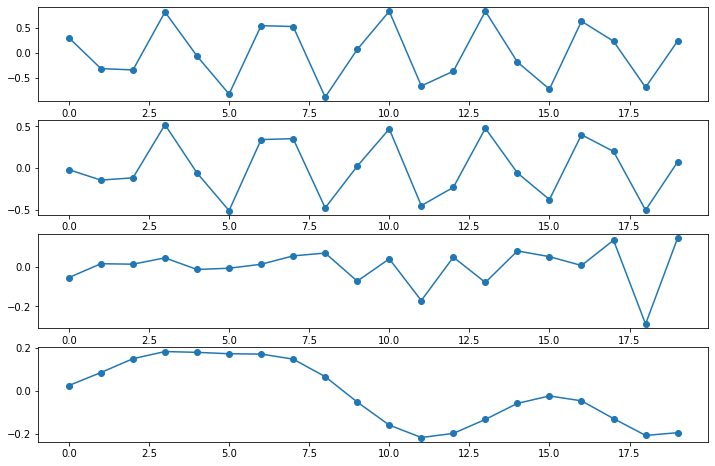

In [142]:
plt.figure(figsize=(12,8))
for i in range(0,M):
  plt.subplot(4,1,i+1)
  plt.plot(RC[str(i)], marker='o')

### Compare between original singal and Recontructed signals

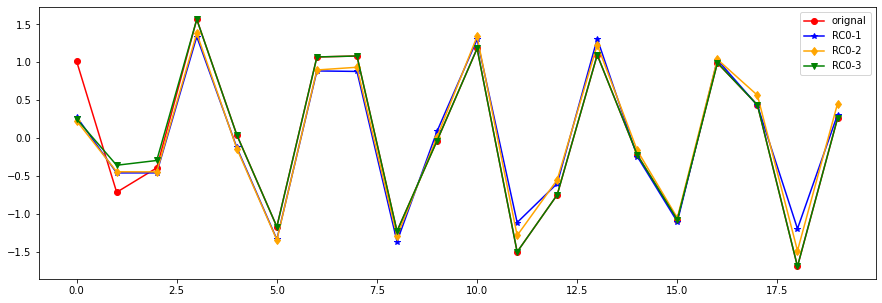

In [163]:
plt.figure(figsize=(15,5))
plt.plot(X, color='red', marker='o')
plt.plot(RC['0'] + RC['1'], color='blue', marker='*')
plt.plot(RC['0'] + RC['1'] + RC['2'], color='orange', marker='d')
plt.plot(RC['0'] + RC['1'] + RC['2'] + RC['3'], color='green', marker='v')
plt.legend(['orignal', 'RC0-1', 'RC0-2', 'RC0-3'])

## Analysis PPG singal with Motion Artifact

In [ ]:
import os

path = 'drive/Shareddrives/AIOT_LAB_DOCS/Data/'
files = os.listdir('/content/'+path)
files

In [ ]:
import pandas as pd
from pathlib import Path

import scipy.io as sio
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
#Xscaled = scaler.fit_transform(dfs[1])

def read_folder(mat_folder, HR = False):
    ''' Input is a folder with csv files; return list of data frames.'''
    mat_folder = Path(mat_folder).absolute()
    if HR == False:
      mat_files = [f for f in mat_folder.iterdir() if f.name.endswith('mat') and not('BPMtrace' in f.name)]
      # Sorting name in order
      mat_files = sorted(mat_files)
      dfs = [
        
        #pd.DataFrame(sio.loadmat(csv_file)['sig']).T.assign(rating_src = f'rating-{idx}')#assin a name rating to the column
        #pd.DataFrame(sio.loadmat(csv_file)['sig']).T.assign(Subject = f'{idx}')
        pd.DataFrame(scaler.fit_transform(pd.DataFrame(sio.loadmat(mat_file)['sig']).T)).assign(Subject = f'{idx-1}') # sclaing [0,1] and then convert to dataframe
        for idx, mat_file in enumerate(mat_files, 1)
    ]
    else:
      mat_files = [f for f in mat_folder.iterdir() if f.name.endswith('mat') and ('BPMtrace' in f.name)] 
      # Sorting name in order
      mat_files = sorted(mat_files)
      dfs = [
        
        #pd.DataFrame(sio.loadmat(csv_file)['sig']).T.assign(rating_src = f'rating-{idx}')#assin a name rating to the column
        #pd.DataFrame(sio.loadmat(csv_file)['sig']).T.assign(Subject = f'{idx}')
        pd.DataFrame(pd.DataFrame(sio.loadmat(mat_file)['BPM0'])).assign(Subject = f'{idx-1}') # sclaing [0,1] and then convert to dataframe
        for idx, mat_file in enumerate(mat_files, 1)
    ]
    #data = scaler.fit_transform(sio.loadmat(csv_file)['sig'])
    # the assign() method adds a helper column rating
    
    return mat_files, dfs

In [ ]:
parent_path ='/content/'+path
mat_files, dfs = read_folder(parent_path)

In [ ]:
mat_files

[PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_01_TYPE01.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_02_TYPE02.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_03_TYPE02.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_04_TYPE02.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_05_TYPE02.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_06_TYPE02.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_07_TYPE02.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_08_TYPE02.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_09_TYPE02.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_10_TYPE02.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_11_TYPE02.mat'),
 PosixPath('/content/drive/Shareddrives/AIOT_LAB_DOCS/Data/DATA_12_TYPE02.mat')]

### Prepare data
* Segment dataset into M part, each part 1000 samples and Step is 250


In [ ]:
def segment(dataframe, step=250, dis=1000):
  #dis = 1000 # 8 seconds
  #step = 250 # 2 seconds
  a= []
  for df in dataframe:
    N = np.shape(df)[0]
    temp = [df.iloc[(i*step):(i*step + dis)] for i in range(0,int(N/step)-3)]
    for ele in temp:
      a.append(ele)
  return a

### Segment the first subject data

In [ ]:
dfseg = segment(dfs[0:1])

In [ ]:
np.shape(dfseg)

(148, 1000, 7)

### Singular Spectrum Analysis

Extracting the PPG 1 of subject 1

In [ ]:
X = []
for i in range(0,np.shape(dfseg)[0]):
  X.append(dfseg[i][1].values) # PPG 1
  
  

  #print(seg['Subject'][0])
X = np.array(X) 


#### Partion subX (Xs)

In [ ]:
 L = 400  #(L < M/2)
 M = 1000
 K = M - L 
 Xs = [X[0][i:i+K] for i in range(0, L)]
 

In [ ]:
Xs[399][-1:]

array([0.71135062])

In [ ]:
np.shape(Xs)[0], np.shape(Xs)[1]

(400, 600)

In [ ]:
 np.shape(X)[0], np.shape(X)[1]

(148, 1000)

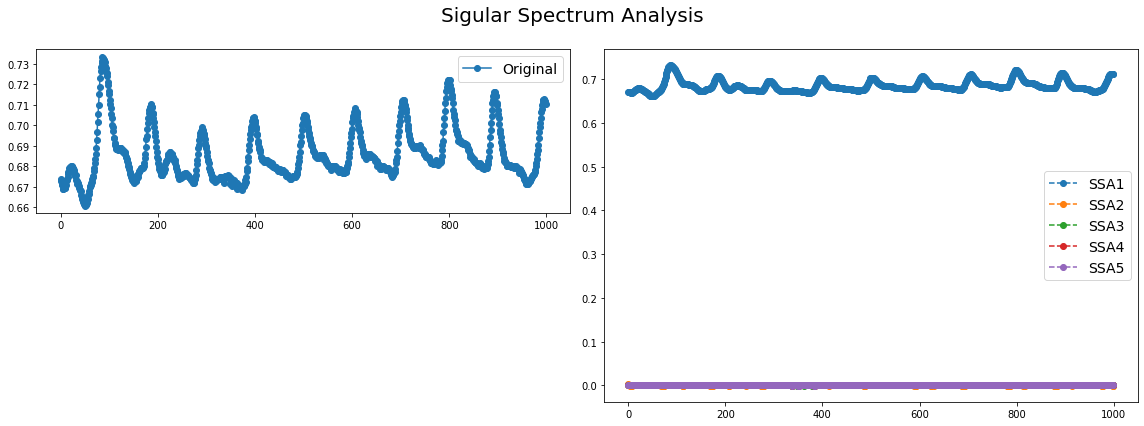

In [ ]:
# Parameters
n_samples, n_timestamps = np.shape(X)[0], np.shape(X)[1]


# decompose the time series into three subseries
#window_size = 30 #15
#groups = [np.arange(i, i+10) for i in range(0, 21, 10)]

# Singular Spectrum Analysis
#ssa = SingularSpectrumAnalysis(window_size=window_size, groups=groups)
ssa = SingularSpectrumAnalysis(window_size=5)
X_ssa = ssa.fit_transform(X)

# Show the results for the first time series and its subseries 
plt.figure(figsize= (16, 6))

ax1 = plt.subplot(221)
ax1.plot(X[0], 'o-', label = 'Original')
ax1.legend(loc='best', fontsize=14)

ax2 = plt.subplot(122)
for i in range(5):
  ax2.plot(X_ssa[0, i], 'o--', label='SSA{0}'.format(i+1))
ax2.legend(loc='best', fontsize=14)

plt.suptitle('Sigular Spectrum Analysis', fontsize=20)

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

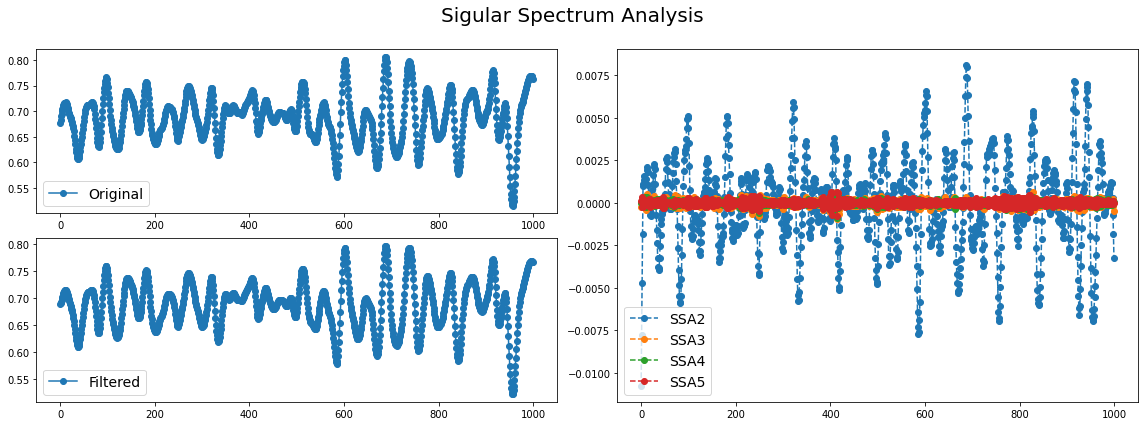

In [ ]:
# Show the results for the first time series and its subseries 
plt.figure(figsize= (16, 6))
k=125
ax1 = plt.subplot(221)
ax1.plot(X[k], 'o-', label = 'Original')
ax1.legend(loc='best', fontsize=14)

ax2 = plt.subplot(223)
ax2.plot(X_ssa[k, 0], 'o-', label = 'Filtered')
ax2.legend(loc='best', fontsize=14)


ax3 = plt.subplot(122)
for i in range(1,5):#len(groups)
  ax3.plot(X_ssa[k, i], 'o--', label='SSA{0}'.format(i+1))
ax3.legend(loc='best', fontsize=14)

plt.suptitle('Sigular Spectrum Analysis', fontsize=20)

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

In [ ]:
from pyts.datasets import load_gunpoint
from pyts.decomposition import SingularSpectrumAnalysis
X, _, _, _ = load_gunpoint(return_X_y=True)
transformer = SingularSpectrumAnalysis(window_size=7)
X_new = transformer.transform(X)
X_new.shape

(50, 7, 150)

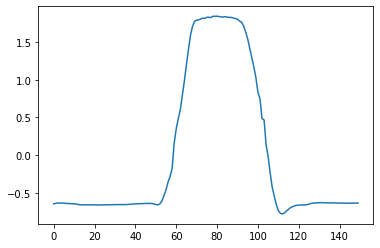

In [ ]:
plt.plot(X[0])

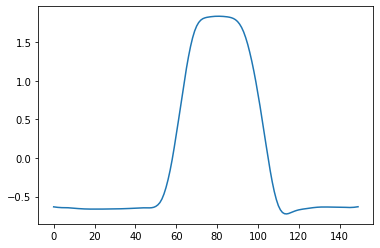

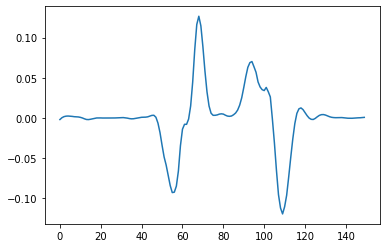

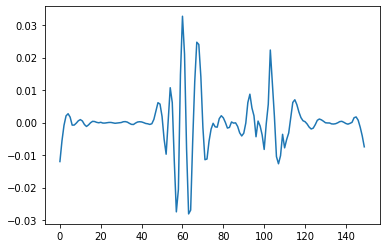

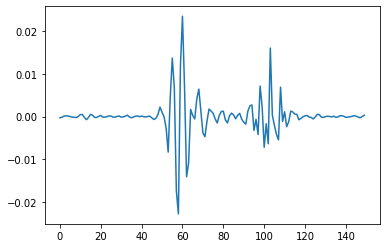

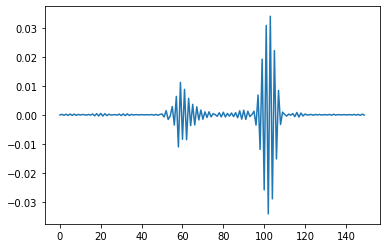

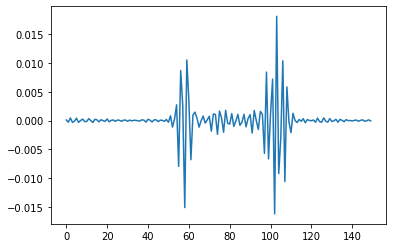

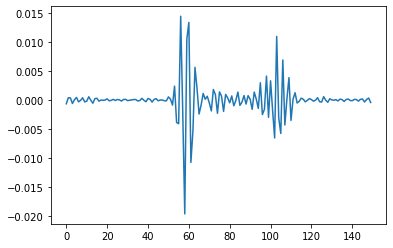

In [ ]:
for i in range(7):
  plt.figure()
  plt.plot(X_new[0][i])

In [ ]:
X[0], X[1]